## PyTorch Workflow

1. Data(prepare aand load)
2. Build model
3. Fitting the model to data
4. Making predictions and evaluating a model (Inference)
5. Saving and loading a model
6. Putting it all together


In [55]:
import torch
from torch import nn   # nn contains all of PyTorch's building blocks for nueral networks

import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

### Data (Preparing and Loading)

Machine Learning is a game of two parts:
1. Get the data into a numerical representation.
2. Build a model to learn patterns in that numerical represenation.

We will use lineae regression formula to make a straight line with known **parameters**.




In [56]:
# Create known parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [57]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

In [58]:
# create a train test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [59]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [60]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, test data, and compares prediction.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  #Plot test data in red
  plt.scatter(test_data, test_labels, c="r", s=4, label="Test Data")

  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size":14});

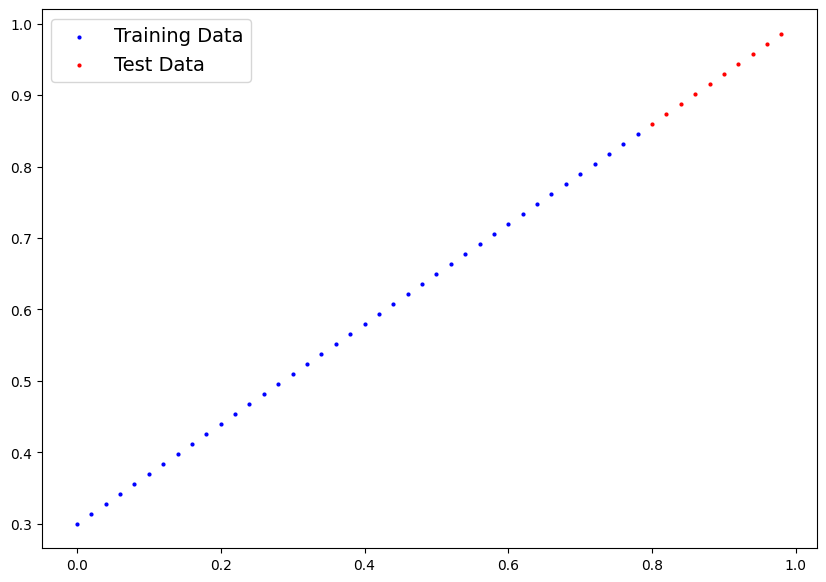

In [61]:
plot_prediction();

### Build Model

Our first PyTorch Model

What our model do?
* Start with random values(weights and bias)
* Look at training data and adjust the random values to better represent(or get closer to) the ideal values(the weight and bias values we used to create the data)

How does it do so?
1. Gradient Descent
2. Backpropogation

In [62]:
from torch import nn

# Create linear Regression model classes

class LinearRegressionModel(nn.Module):  # <-Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:   # x is the input data
    return self.weights * x + self.bias   # This is linear regression formula


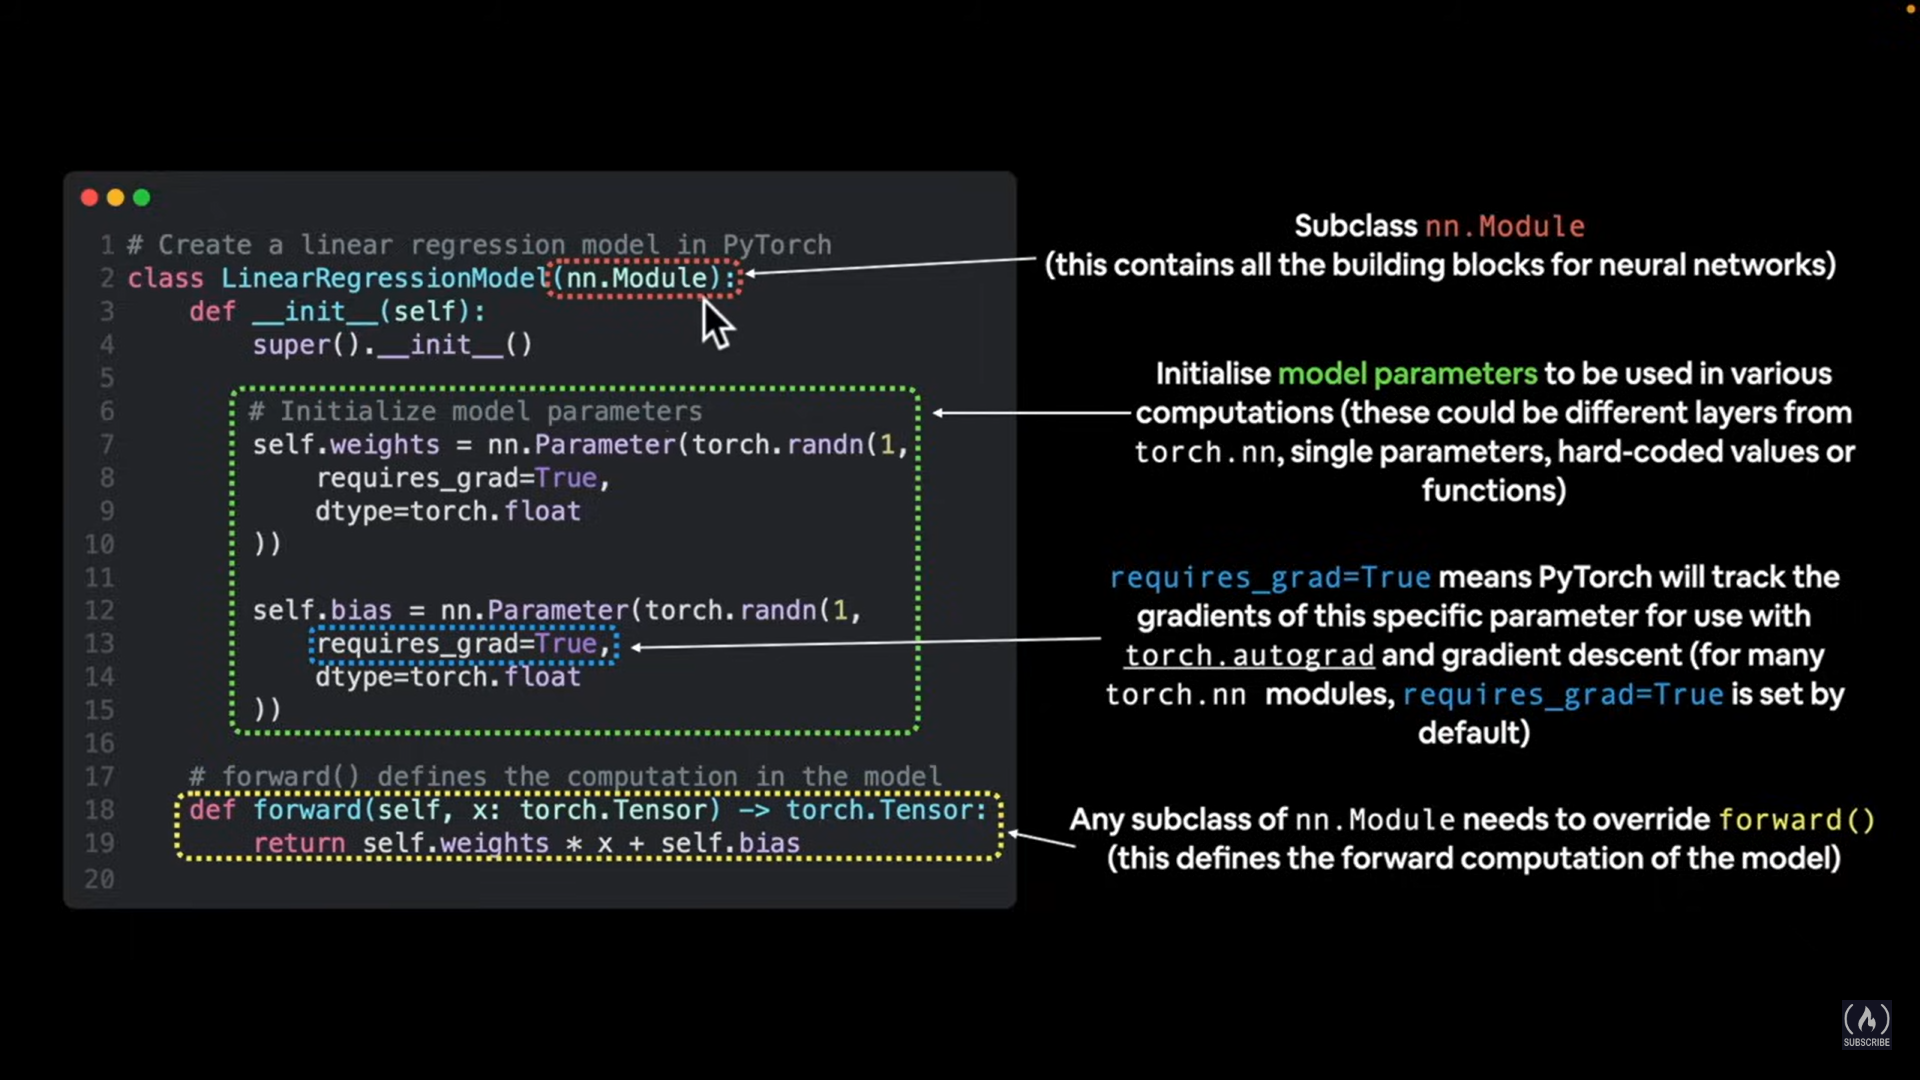

### PyTorch model building essentials

1. **torch.nn** -	Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

2. **torch.nn.Parameter** - Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".

3. **torch.nn.Module** - The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.

4. **torch.optim** - Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

5. **def forward()** - All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).

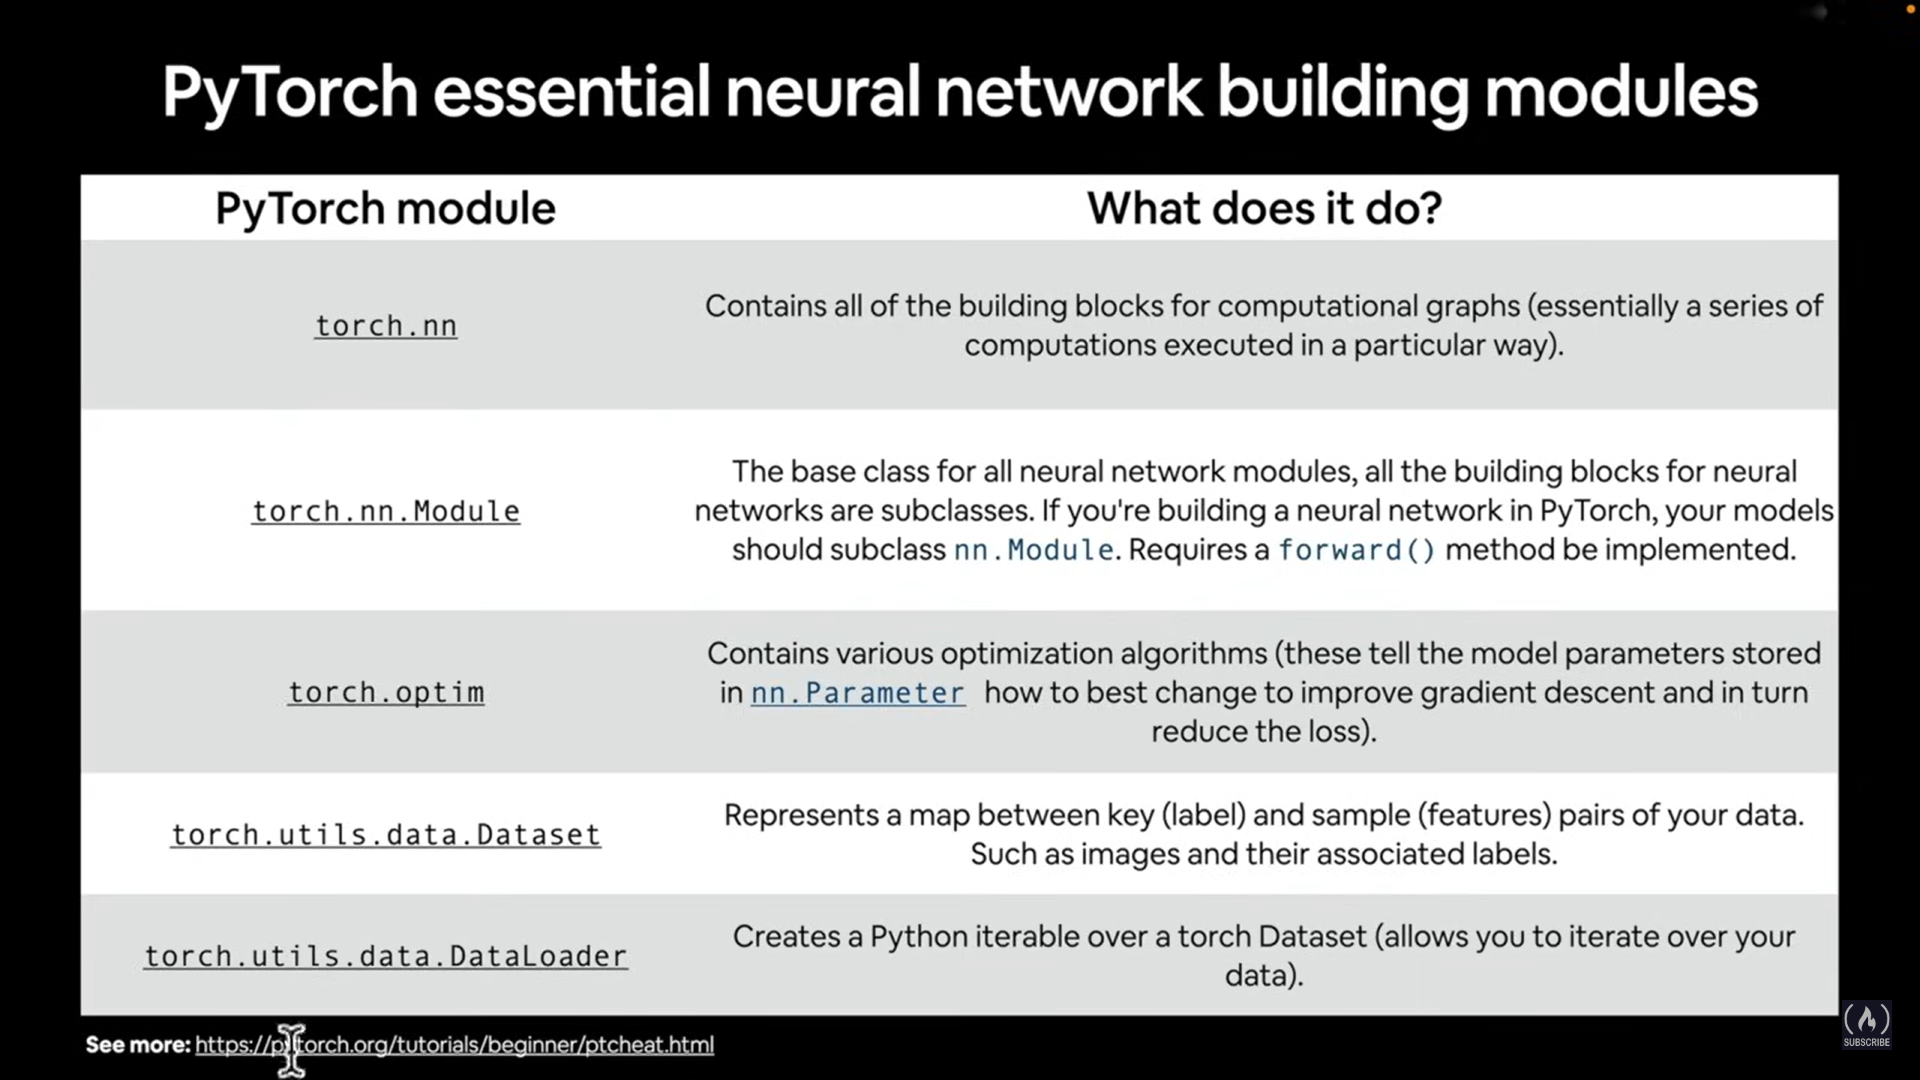

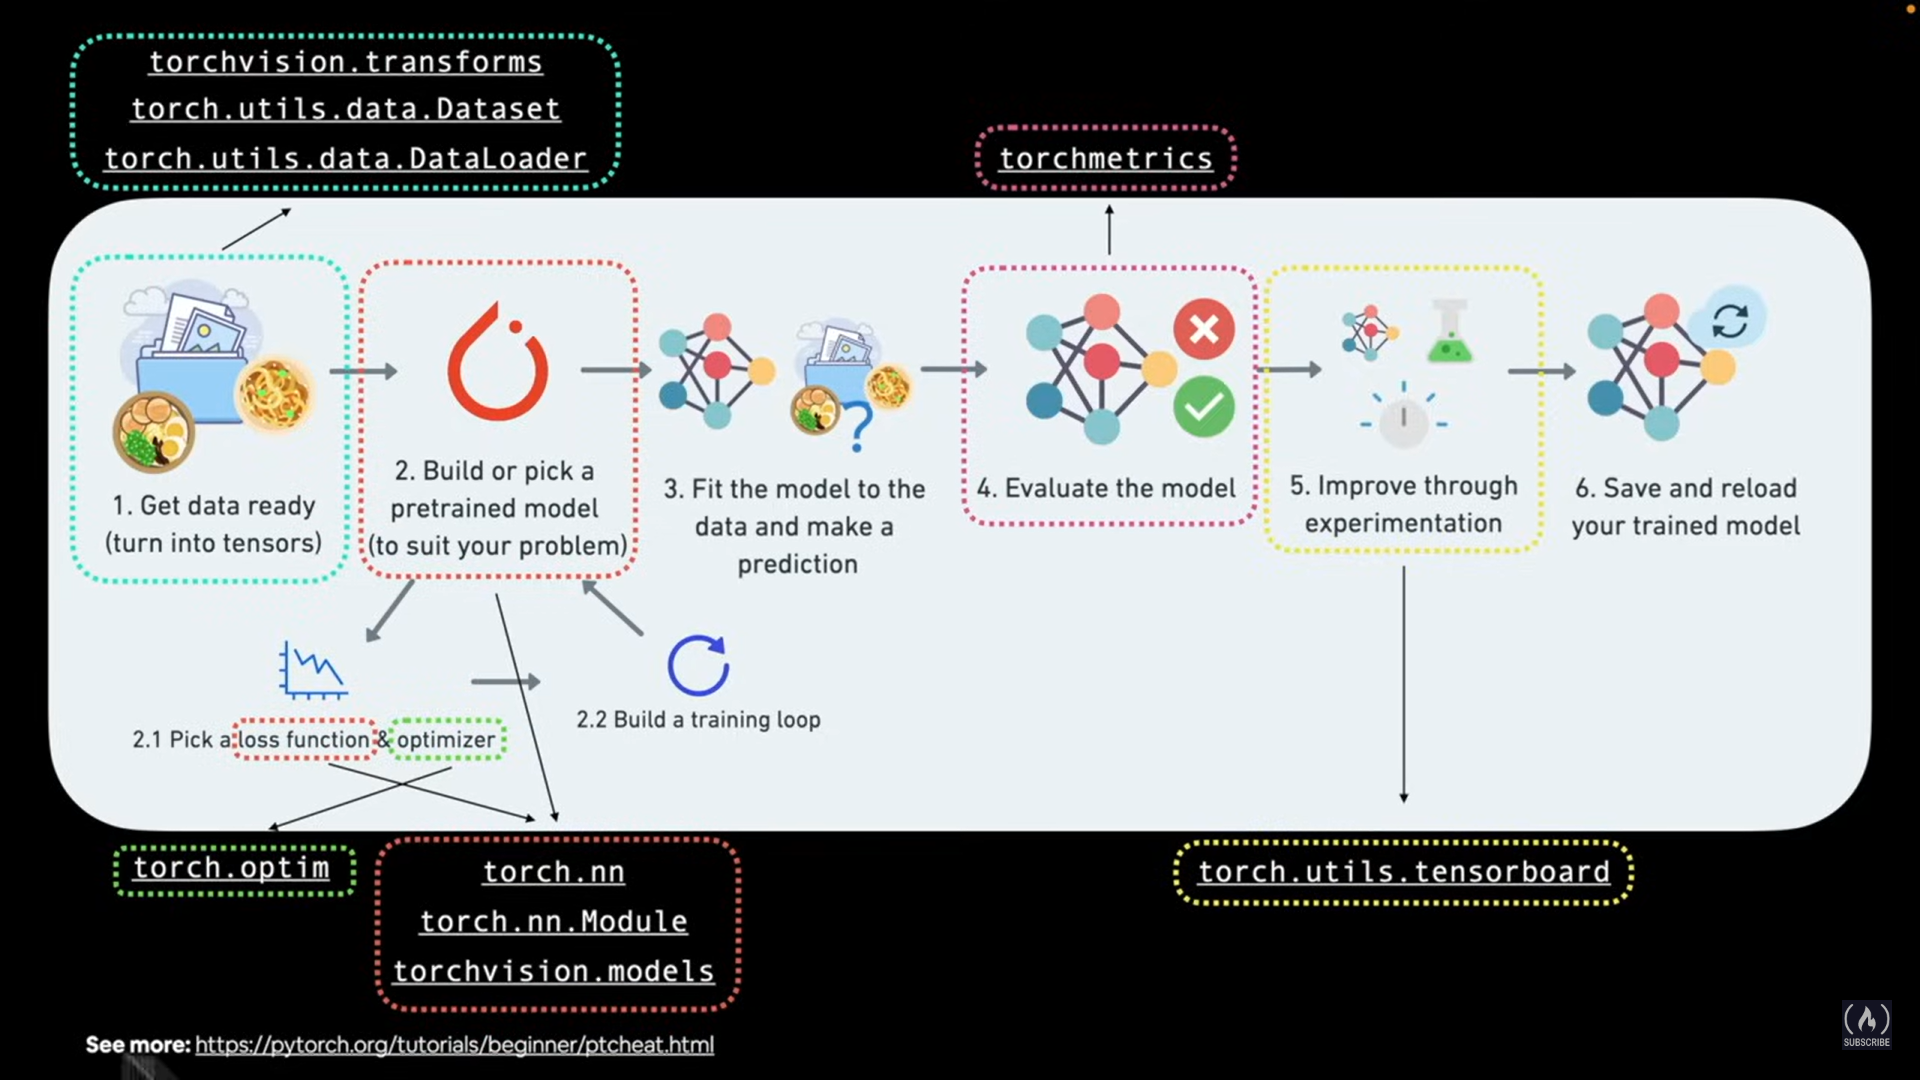

### Checking the contents of our PyTorch model

* So we can check our model parameters or what's inside our model using ` .parameters() `

In [97]:
# create a ramdom seed
torch.manual_seed(42)

# Create the instance of the model(this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1236], dtype=torch.float64, requires_grad=True)]

In [98]:
# Lis the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1236], dtype=torch.float64))])

In [99]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

* To check our model's predictive power, let's see how well it predicts y_test based on x_test.
* When we pass data through our model, it's going to run it through the forward() method

In [100]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [101]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3929],
        [0.3997],
        [0.4064],
        [0.4131],
        [0.4199],
        [0.4266],
        [0.4333],
        [0.4401],
        [0.4468],
        [0.4535]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [102]:
# Make predictions
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

"""
InferenceMode is a new context manager analogous to no_grad to be used when you are certain your operations will have no interactions with autograd (e.g., model training). Code run under this mode gets better performance by disabling view tracking and version counter bumps.
"""

'\nInferenceMode is a new context manager analogous to no_grad to be used when you are certain your operations will have no interactions with autograd (e.g., model training). Code run under this mode gets better performance by disabling view tracking and version counter bumps.\n'

In [103]:
# we can also use

with torch.no_grad():
  y_preds = model_0(X_test)

y_preds


##But inference_mode() is preferred

tensor([[0.3929],
        [0.3997],
        [0.4064],
        [0.4131],
        [0.4199],
        [0.4266],
        [0.4333],
        [0.4401],
        [0.4468],
        [0.4535]], dtype=torch.float64)

In [104]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

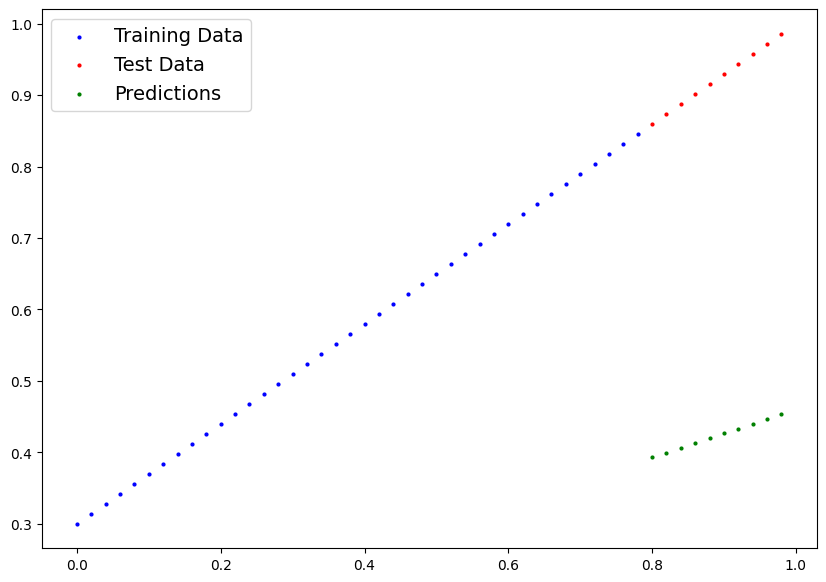

In [105]:
plot_prediction(predictions = y_preds)

### Train Model

* The whole idea of training is for a model to move from some unknown parameters(these may be random) to some known parameters.

* Or in other words from a poor representation of the data to a better representation of the data.

* One way to measure how poor or how wrong your model's predictions are `Loss function`. Loss function is also called as cost function.

Things we need to train:

1. **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
2. **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(eg. weights and bias in our case) to improve the loss function.

And specifically for PyTorch we need:
1. A training loop
2. A testing loop

In [108]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1236], dtype=torch.float64, requires_grad=True)]

In [109]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1236], dtype=torch.float64))])

### Setting up a loss function and optimizer

In [110]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer stochastic gradient descent
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)  # lr = learning rate = possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch

Things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propogation
2. Calculate the loss (compare forward pass prediction to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(**Backpropogation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**Gradient Descent**)

In [111]:
model_0.parameters()

<generator object Module.parameters at 0x7931032a9150>

In [131]:
torch.manual_seed(42)

# An epoch is one loop through the data... (This is a hyperparameter because we've set it ourselves)
epochs = 200

# Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []


### Training

# 0. Loop through data
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() # Train mode in PyTorch sets all parametrs that require gradients to require gradients

  # 1. Forward pass
  y_preds = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_preds, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropogation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()  # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the nxt iteartion of the loop


  ### Testing

  model_0.eval() # Turns off different settings in the model not needed in for evaluation/testing (dropout/batch norm layers)

  with torch.inference_mode():    # turns off gradient tracking and a couple more things behind the scenes
    # 1. Forward pass
    test_preds = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_preds, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"epochs : {epochs} | Loss: {loss} | Test loss: {test_loss}")

    # Print out model state_dict()
    print(model_0.state_dict())


epochs : 200 | Loss: 0.0025001050897027755 | Test loss: 0.00829629978704347
OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.3096], dtype=torch.float64))])
epochs : 200 | Loss: 0.0025001050897027755 | Test loss: 0.00829629978704347
OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.3096], dtype=torch.float64))])
epochs : 200 | Loss: 0.0025001050897027755 | Test loss: 0.00829629978704347
OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.3096], dtype=torch.float64))])
epochs : 200 | Loss: 0.0025001050897027755 | Test loss: 0.00829629978704347
OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.3096], dtype=torch.float64))])
epochs : 200 | Loss: 0.0025001050897027755 | Test loss: 0.00829629978704347
OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.3096], dtype=torch.float64))])
epochs : 200 | Loss: 0.0025001050897027755 | Test loss: 0.00829629978704347
OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.3096], dtyp

In [132]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0025, dtype=torch.float64, 

In [133]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), np.array(torch.tensor(test_loss_values).numpy())

(array([0.00250011, 0.00250011, 0.00250011, 0.00250011, 0.00250011,
        0.00250011, 0.00250011, 0.00250011, 0.00250011, 0.00250011,
        0.00250011, 0.00250011, 0.00250011, 0.00250011, 0.00250011,
        0.00250011, 0.00250011, 0.00250011, 0.00250011, 0.00250011]),
 array([0.0082963, 0.0082963, 0.0082963, 0.0082963, 0.0082963, 0.0082963,
        0.0082963, 0.0082963, 0.0082963, 0.0082963, 0.0082963, 0.0082963,
        0.0082963, 0.0082963, 0.0082963, 0.0082963, 0.0082963, 0.0082963,
        0.0082963, 0.0082963]))

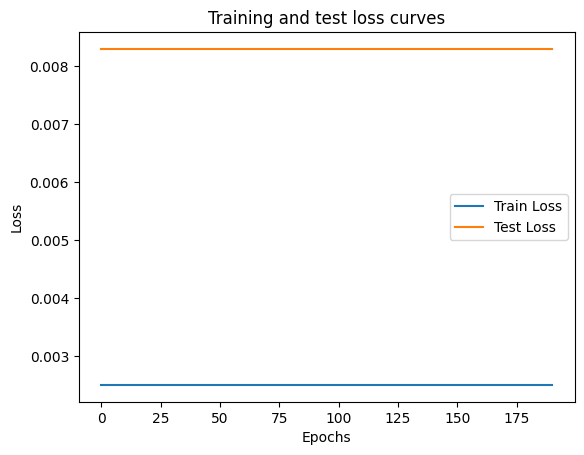

In [134]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [114]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [115]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6947])),
             ('bias', tensor([0.2996], dtype=torch.float64))])

In [116]:
weight, bias

(0.7, 0.3)

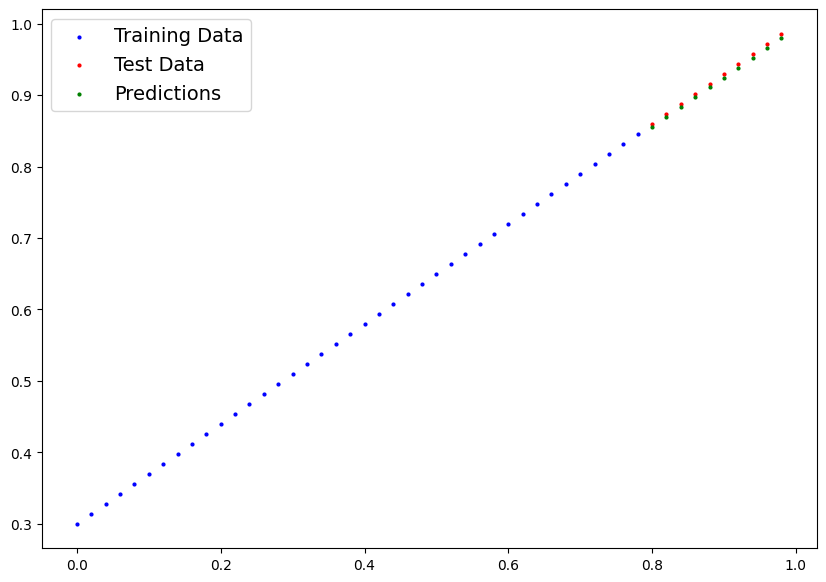

In [117]:
plot_prediction(predictions = y_preds_new)

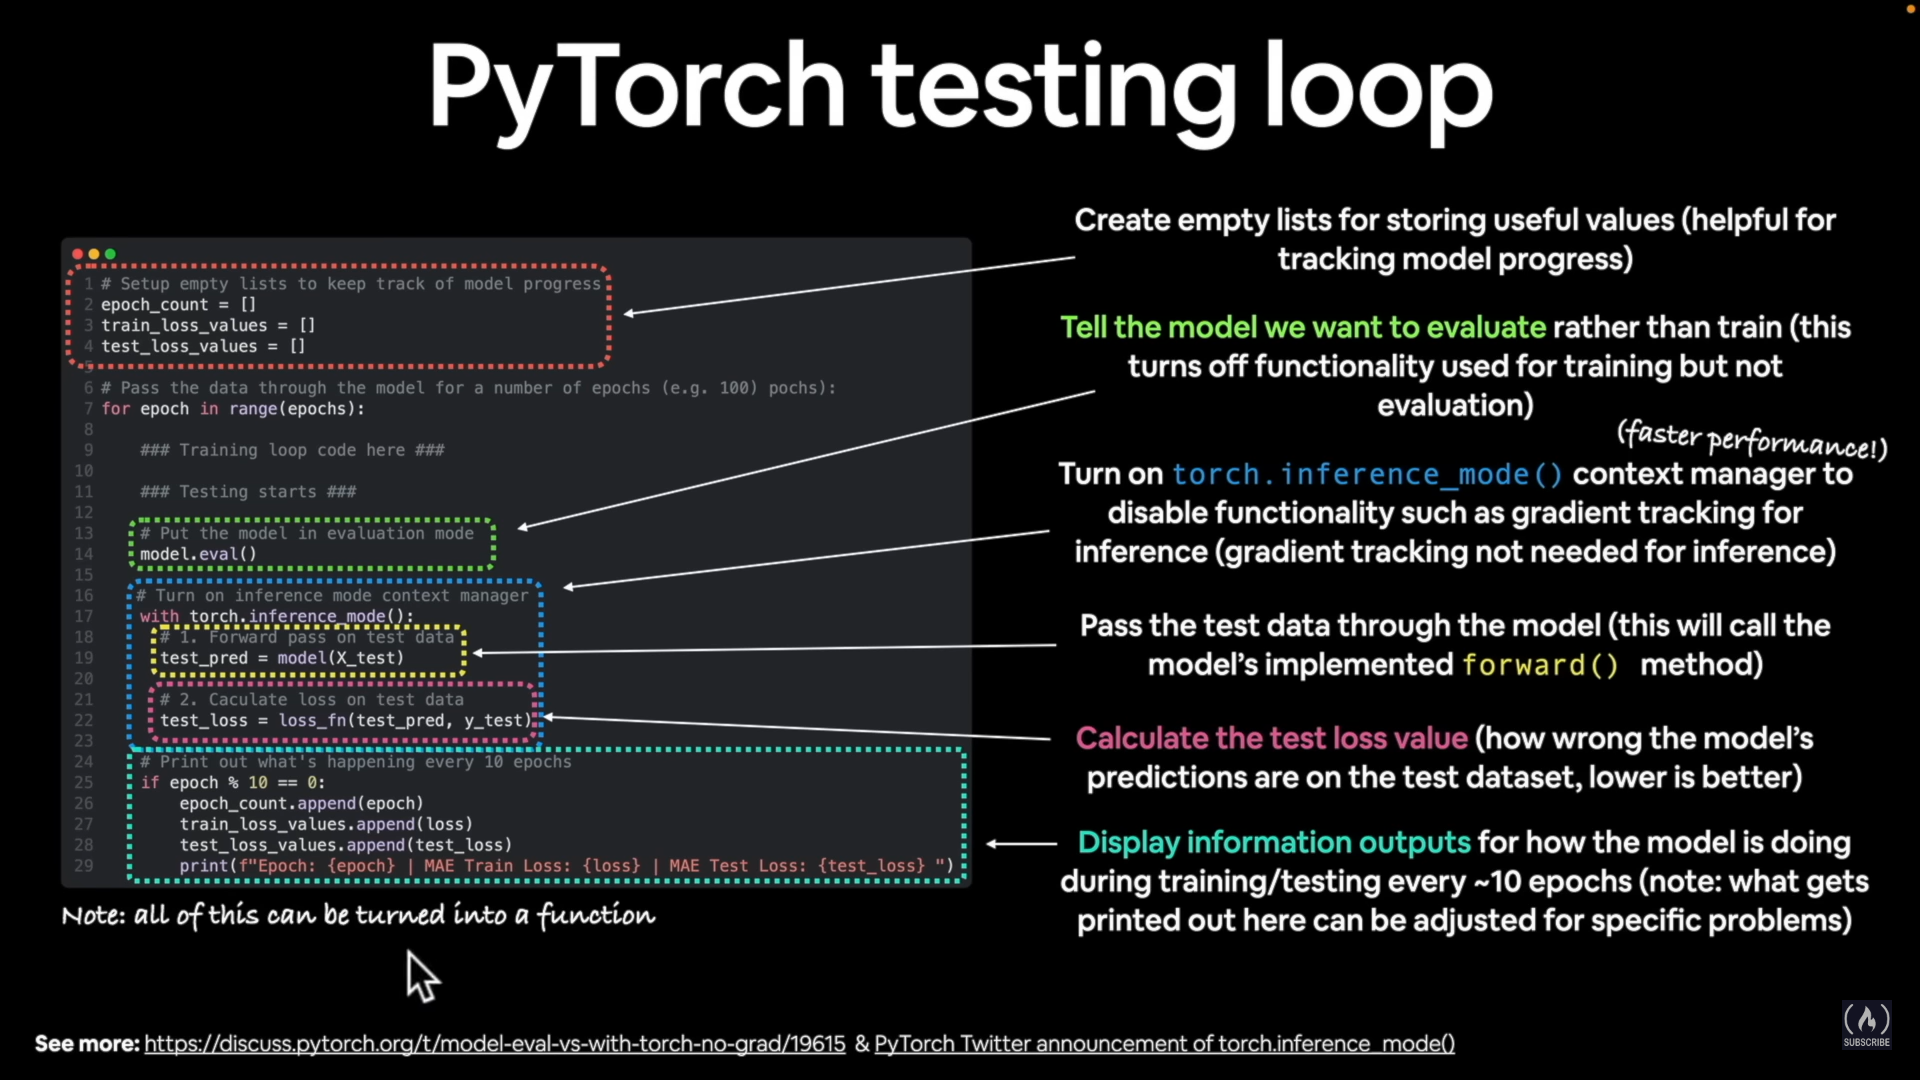

### Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a Pytorchobject in Python's pickle format.
2. `torch.load()` - allows you to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary.

In [137]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "PyTorch Workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/PyTorch Workflow.pth


In [138]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1550 Jun 10 19:11 'PyTorch Workflow.pth'


### LOading PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [139]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6947])),
             ('bias', tensor([0.2996], dtype=torch.float64))])

In [143]:
# To load in saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [144]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6947])),
             ('bias', tensor([0.2996], dtype=torch.float64))])

In [145]:
# Make some predictions with our loaded model
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8553],
        [0.8692],
        [0.8831],
        [0.8970],
        [0.9109],
        [0.9248],
        [0.9387],
        [0.9526],
        [0.9665],
        [0.9803]], dtype=torch.float64)

In [147]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8553],
        [0.8692],
        [0.8831],
        [0.8970],
        [0.9109],
        [0.9248],
        [0.9387],
        [0.9526],
        [0.9665],
        [0.9803]], dtype=torch.float64)

In [148]:
# Compare loaded model preds with original model preds

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])